# 03. 회귀분석

<br>

## 03.01. 상관분석

In [2]:
library(lavaan)
library(sem)
library(semPlot)
library(semptools)
library(psych)
library(tidyverse)

In [5]:
library(car)

- X, Y, Z 사이에 모두 상당히 큰 양의 연관성

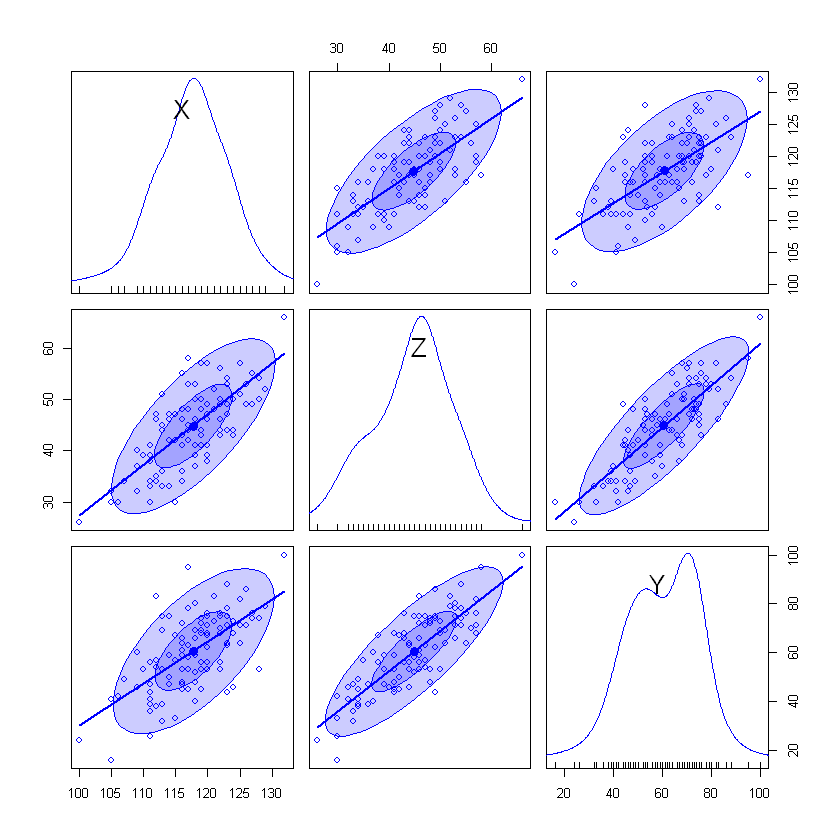

In [14]:
Blood <- read.csv(paste0(getwd(), "/Data/Blood.csv"), header = TRUE)
scatterplotMatrix(~ X + Z + Y, data=Blood, ellipse=TRUE, smooth=FALSE)

<br>

### 상관분석

- 모든 상관계수가 큰 양의 값을 가짐
- p-값 (유의확률)이 모두 0.001보다 작으므로, 모든 상관계수에 대하여 모상관계수가 0이라는 가설 ($H_0:\rho=0$)을 기각

In [12]:
library(Hmisc)

In [11]:
rcorr(as.matrix(Blood))

     X    Z    Y
X 1.00 0.74 0.64
Z 0.74 1.00 0.82
Y 0.64 0.82 1.00

n= 100 


P
  X  Z  Y 
X     0  0
Z  0     0
Y  0  0   

<br>

## 03.02. 단순 회귀분석
- 상관분석은 방향성을 고려하지 않고, 연관관계를 분석하는데 반해, **회귀분석은 방향성을 고려한 인과관계를 분석**
- **결과의 역할을 하는 변수를 종속변수(dependent variable), 원인의 역할을 하는 변수를 설명변수 (explortary variable)**

- 단순 회귀보형은 설명변수가 하나만 있는 경우

$$Y = \alpha + \beta X + \epsilon$$

- 오차항 $\epsilon$은 평균 0과 분산 $\sigma^2$을 가지는 정규본포를 따르는 것으로 가정

In [15]:
Blood.A.fit <- lm(Y ~ X, data = Blood)
summary(Blood.A.fit)


Call:
lm(formula = Y ~ X, data = Blood)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.559  -8.084   0.526   7.059  35.733 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -141.440     24.719  -5.722 1.15e-07 ***
X              1.715      0.210   8.168 1.11e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.16 on 98 degrees of freedom
Multiple R-squared:  0.405,	Adjusted R-squared:  0.3989 
F-statistic: 66.71 on 1 and 98 DF,  p-value: 1.112e-12


<br>

#### 표준화 추정치
- **표준화 추정치(standardized estimates)는 모든 변수들을 표준화하여 회귀분석을 수행하여 얻은 추정치**
    - 기울기의 표준화 추정치 0.636은 단순 상관계수 $Cor(X_1, Y)$과 동일
    - 단순 회귀분석의 $R^2$는 상관계수의 제곱과 동일
- **즉, 단순 상관모형과 단순 회귀모형은 수리적으로 동치관계를 가짐**

In [19]:
library(lm.beta)

In [20]:
Blood.A.beta <- lm.beta(Blood.A.fit)
summary(Blood.A.beta)


Call:
lm(formula = Y ~ X, data = Blood)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.559  -8.084   0.526   7.059  35.733 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -141.4403           NA    24.7192  -5.722 1.15e-07 ***
X              1.7154       0.6364     0.2100   8.168 1.11e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.16 on 98 degrees of freedom
Multiple R-squared:  0.405,	Adjusted R-squared:  0.3989 
F-statistic: 66.71 on 1 and 98 DF,  p-value: 1.112e-12


<br>

#### 기울기 $\hat{\beta} = 141.44$로 추정되었으며, 유의수준 5%하에서 통계적으로 유의
#### $\rightarrow$ 이러한 결과들로부터 설명변수가 종속변수에 영향을 미친다고 결론을 내릴 수 있는가?
#### $\rightarrow$ 다른 원인에 의하여 이와 같은 결과가 얻어졌는지를 탐색할 필요성 존재

<br>

## 03.03. 편상관 계수

- **Z와 X의 상관계수가 0.736, Z와 Y의 상관계수가 0.82 $\rightarrow$ Z에 의하여 X와 Y의 상관관계가 높게 나타날 수 있다는 짐작 가능**
- **이와 같이 다른 변수의 효과로 인해 나타나는 상관성을 의사상관(pseudo correlation)**
- **의사상관을 제거하고 두 변수 사이의 상관성을 분석하는 한 가지 방법은 편상관계수(partial correlation coefficient)를 계산하는 것**
    - 효과를 제거하고자 하는 다른변수를 **통제변수(control variable, 제어변수)**
    - **통제 : 모든 개체에 대하여 통제변수의 값이 동일하다는 가정하에서 상관계수를 추정**

<br>

### pcor

* ggm (function for graphical markov models)

In [25]:
library(ggm)

- **Z를 통제한 상태에서 X와 Y의 상관계수 $Cor(X,Y|X_2)=0.083$**
    - p-값이 0.415로서 편상관계수가 통계적으로 유의하지 않음
- **따라서 X와 Y의 상관성은 Z의 효과로 인하여 높은 것 처럼 나타난 것이며, 실제 두 변수 사의의 상관성은 낮다고 결론**

In [31]:
Blood.cov <- cov(Blood)
Blood.pcor <- pcor(c("X", "Y", "Z"),Blood.cov)

Blood.pcor

[1] 0.08284882

In [39]:
pcor.test(Blood.pcor, 1, n = nrow(Blood))

$tval
[1] 0.8187811

$df
[1] 97

$pvalue
[1] 0.4149184

<br>

### sem

- 아래 그림에는 편상관분석을 위한 경로도
- **내생 오차변수 간에 연관관계 (양방향 화살표)가 존재, 내생오차들간의 연관관계는 편상관의 의미를 가짐 (내생오차는 설명변수들에 의해 설명되지 않는 부분을 의미)**

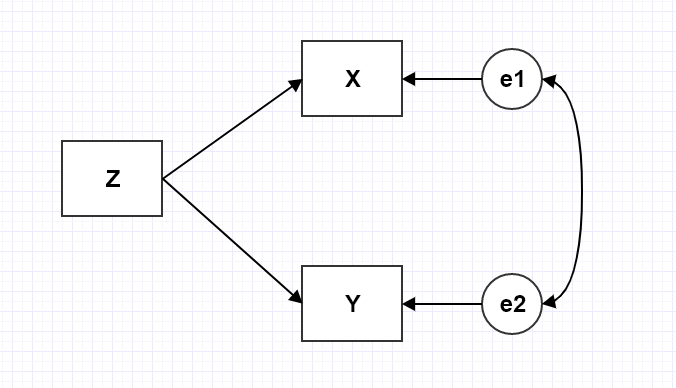

<br>

#### `sem(model, data, fixed.x, missing)`
- **`fixed.x`** : `FALSE`로 입력시 외생변수들의 공분산 및 상관계수 출력 

    - **$'\sim\sim'$로 연결되어 있는 부분의 `Estimate`은 두 변수 사이의 공분산 추정치, `std.all`은 상관계수 (표준화된 공분산)**
- **`missing`** : 결측값 처리 방법 
    - `'listwise'` : 목록별 결측값 제거
    - `'pairwise'` : 대응별 결측값 제거
    - `'ml'` : FIML을 통한 결측값 대체 (= `'direct'`, `'fiml'`) + **절편출력**

In [68]:
# detach("package:sem",unload=TRUE)
library(lavaan)

In [104]:
Blood.B.model <- '
    # regression
    X ~ Z
    Y ~ Z
    
    # residual correlations
    X ~~ Y
'

In [100]:
Blood.B.fit <- sem(Blood.B.model, data = Blood)
summary(Blood.B.fit, rsquare=FALSE, standardized=TRUE)$pe

lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,~,Z,0,0.5486769,0.0505394,10.8564191,0.000000e+00,0.5486769,0.73552260,0.09475804
Y,~,Z,0,1.6523641,0.1145826,14.4207238,0.000000e+00,1.6523641,0.82175400,0.10586731
X,~~,Y,0,2.8906465,3.5010157,0.8256594,4.089973e-01,2.8906465,0.08284882,0.08284882
X,~~,X,0,15.3893406,2.1763814,7.0710678,1.537437e-12,15.3893406,0.45900651,0.45900651
Y,~~,Y,0,79.1037978,11.1869664,7.0710678,1.537437e-12,79.1037978,0.32472037,0.32472037
Z,~~,Z,1,60.2504000,0.0000000,NA,NA,60.2504000,1.00000000,60.25040000


**편상관분석의 결과**

<br>

**회귀계수 (Regression)**

| 내생변수 | 설명변수 | 회귀계수 | 표준화추정치 | p-값 | SMC |
| - | - | - | - | - | - | 
| X | Z | 0.549 | 0.736 | < 0.001 | 0.541 | 
| Y | Z | 1.652 | 0.822 | <0.001 | 0.675 | 

<br>

**편상관 (Partial correlation)**

| 내생변수 | 공분산 | 상관계수 | p-값 | 
| - | - | - | - | 
| X, Y | 2.891 | 0.083 | 0.409 |

<br>

#### 경로도 시각화

In [101]:
library(semPlot)

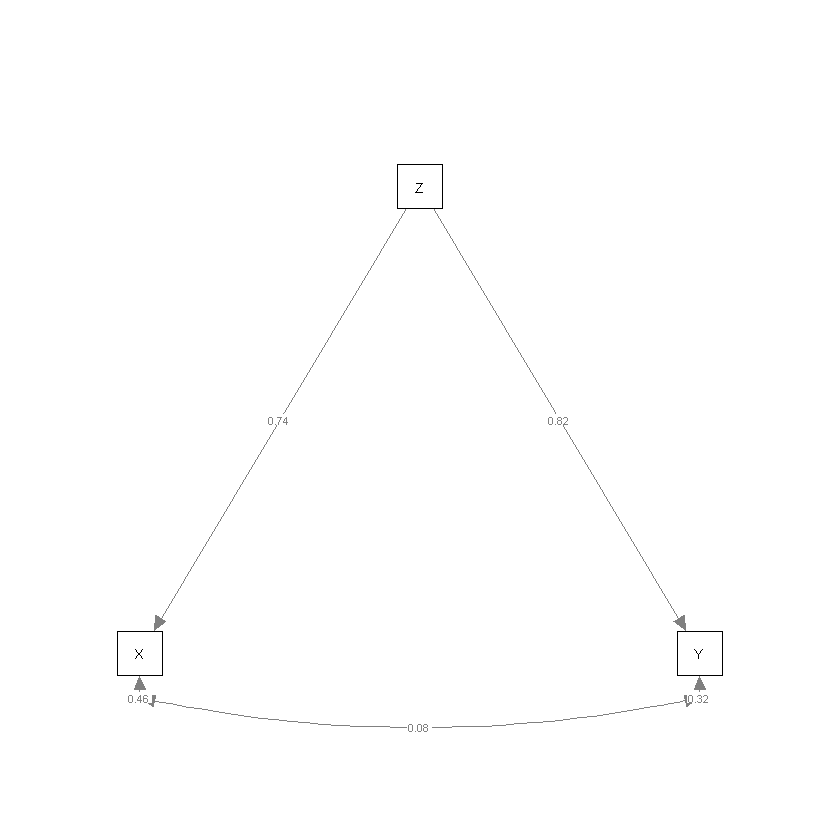

In [103]:
semPaths(Blood.B.fit, whatLabels = "std", style="lisrel", nCharNodes = 0)

<br>

## 03.04. 다중 회귀분석
- 통제변수의 효과를 분석하는 다른 하나의 방법은 **다중 회귀분석**
- 종속변수 Y와 $p$개의 설명변수가 있을 때

$$Y = \alpha + \beta_1 X_1 + \dots + \beta_p X_p + \epsilon$$

#### 다중 회귀분석의 결과

| 설명변수 | 회귀계수 | 표준화 추정치 | p-값 | SMC($R^2$ |
| - | - | - | - | - |
| Intercept | -31.031 | - | 0.161 | 0.678 | 
| X | 0.188 | 0.070 | 0.415 | | 
| Z | 1.549 | 0.771 | < .001 | |

- $R^2$는 0.678이므로, 종속변수의 변이 중 두 개의 설명변수 X와 Z에 설명되는 비율은 67.8%
- X에 대한 표준화 추정치는 p-값이 0.415로서 통계적으로 유의하지 않음 **(편상관분석의 p-값과 동일)**
    - **따라서 Z가 통제된 상태에서 X은 Y에 영향을 미치지 않는다는 결론**
- **Z는 X가 통제된 상태에서도 Y에 유의한 영향을 미침 (p-값 < 0.05)**

In [105]:
Blood.C.fit <- lm(Y ~ X + Z, data = Blood)
Blood.C.beta <- lm.beta(Blood.C.fit)
summary(Blood.C.beta)


Call:
lm(formula = Y ~ X + Z, data = Blood)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.989  -6.413  -1.153   6.693  21.725 

Coefficients:
             Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) -31.03085           NA   21.98482  -1.411    0.161    
X             0.18783      0.06968    0.22941   0.819    0.415    
Z             1.54930      0.77050    0.17113   9.053 1.48e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.999 on 97 degrees of freedom
Multiple R-squared:  0.6775,	Adjusted R-squared:  0.6709 
F-statistic: 101.9 on 2 and 97 DF,  p-value: < 2.2e-16


<br>

## 03.05. 다중 회귀분석 (2)

In [110]:
Ability <- read.csv(paste0(getwd(), "/Data/Ability.csv"), header = TRUE)
Ability.A.fit <- lm(Y ~ X1 + X2 + X3 + X4, data = Ability)

In [111]:
Ability.A.beta <- lm.beta(Ability.A.fit)
summary(Ability.A.beta)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4, data = Ability)

Residuals:
   Min     1Q Median     3Q    Max 
-5.614 -1.264 -0.224  1.058  4.059 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) 73.15526           NA    1.68258  43.478  < 2e-16 ***
X1           0.14245      0.05498    0.10157   1.403    0.168    
X2           0.84501      0.28250    0.13186   6.408 7.72e-08 ***
X3          -0.27220     -0.06116    0.16825  -1.618    0.113    
X4           0.76269      0.79383    0.03949  19.312  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.138 on 45 degrees of freedom
Multiple R-squared:  0.9591,	Adjusted R-squared:  0.9554 
F-statistic: 263.5 on 4 and 45 DF,  p-value: < 2.2e-16


$$\hat{Y} = 73.155 + 0.142X_1 + 0.845X_2 - 0.272X_3 + 0.763X_4$$

- 각 회귀계수에 대한 t-검정의 p-값을 살펴보면, $X_2$, $X_4$에 대한 p-값은 유의수준 5%보다 작음으로, 이 변수들은 종속변수를 설명하는데 유의하게 기여
    - 나머지 변수는 유의하지 않음

<br>

**다중 회귀분석에서 회귀계순 $\beta_k$는 '설명변수 $X_k$를 제외한 다른 모든 설명변수의 값이 동일할 때 (즉, 다른 모든 설명변수의 값이 같도록 통제되어 있을 때), $X_k$가 1단위 증가하면 종속변수 Y가 $\beta_k$만큼 증가한다'는 것을 의미**
* **즉, 다중 회귀분석에서는 어떤 설명변수들을 함께 고려하느냐에 따라서 결과가 달라짐 $\rightarrow$ 회귀계수를 편회귀계수(partial regression coefficient)라고 부름**

<br>

- `sem`을 적용한 결과도, 위의 결과와 동일

In [133]:
Ability.B.model <- '
    # regression
    Y ~ X1 + X2 + X3 + X4
'

<br>

- **`sem()`의 `missing` 매개변수를 `"ml"`로 입력 시, 절편 출력**

In [134]:
Ability.B.fit <- sem(Ability.B.model, data = Ability, missing="ml")

lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Y,~,X1,0,0.1424510,0.09635708,1.478365,1.393100e-01,0.1424510,0.05497633,0.01421303
Y,~,X2,0,0.8450082,0.12509460,6.754953,1.428813e-11,0.8450082,0.28250470,0.08431061
Y,~,X3,0,-0.2722029,0.15961475,-1.705375,8.812457e-02,-0.2722029,-0.06115546,-0.02715902
Y,~,X4,0,0.7626917,0.03746641,20.356676,0.000000e+00,0.7626917,0.79383359,0.07609749
Y,~~,Y,0,4.1124281,0.82248562,5.000000,5.733031e-07,4.1124281,0.04093935,0.04093935
X1,~~,X1,1,14.9616000,0.00000000,NA,NA,14.9616000,1.00000000,14.96160000
X1,~~,X2,1,7.7896000,0.00000000,NA,NA,7.7896000,0.60101135,7.78960000
X1,~~,X3,1,0.8992000,0.00000000,NA,NA,0.8992000,0.10323957,0.89920000
X1,~~,X4,1,15.8872000,0.00000000,NA,NA,15.8872000,0.39373062,15.88720000


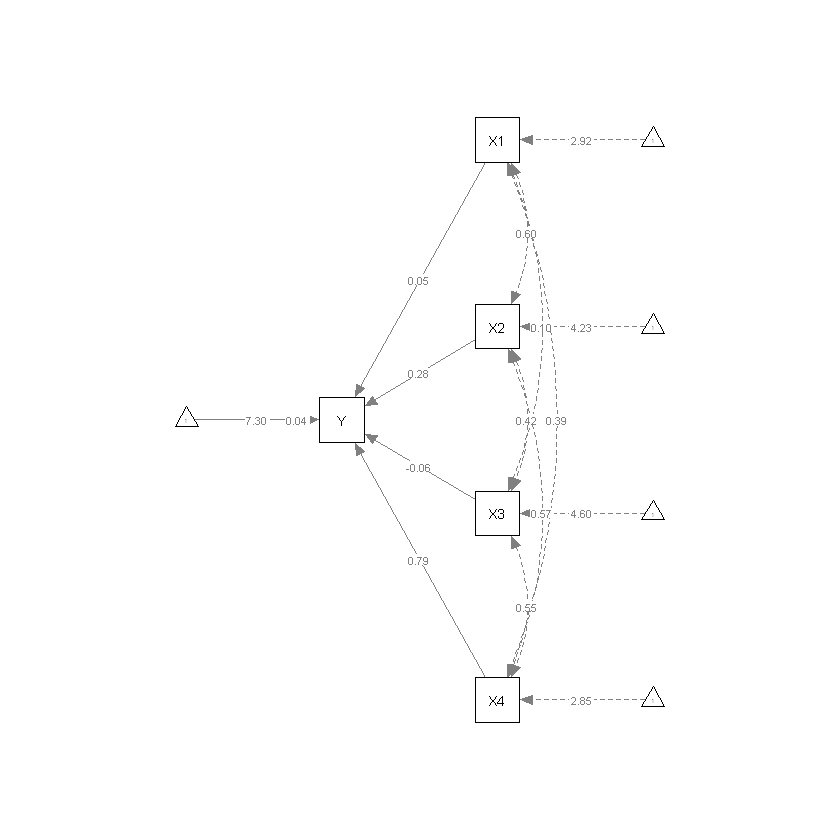

In [130]:
semPaths(Ability.B.fit, whatLabels = "std", style = "lisrel", nCharNodes = 0, rotation = 4)
summary(Ability.B.fit, rsquare = FALSE, standardized = TRUE)$pe

#### 외생변수들의 공분산 및 상관계수 출력 

- **$'\sim\sim'$로 연결되어 있는 부분의 `Estimate`은 두 변수 사이의 공분산 추정치, `std.all`은 상관계수 (표준화된 공분산)**

In [135]:
Ability.B.fit <- sem(Ability.B.model, data = Ability, missing="ml", fixed.x = FALSE)

In [137]:
summary(Ability.B.fit, rsquare = FALSE, standardized = TRUE)$pe

lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Y,~,X1,0,0.1424510,0.09635708,1.4783653,1.393100e-01,0.1424510,0.05497633,0.01421303
Y,~,X2,0,0.8450082,0.12509460,6.7549528,1.428813e-11,0.8450082,0.28250470,0.08431061
Y,~,X3,0,-0.2722029,0.15961475,-1.7053746,8.812457e-02,-0.2722029,-0.06115546,-0.02715902
Y,~,X4,0,0.7626917,0.03746641,20.3566762,0.000000e+00,0.7626917,0.79383359,0.07609749
Y,~~,Y,0,4.1124281,0.82248562,5.0000000,5.733032e-07,4.1124281,0.04093935,0.04093935
X1,~~,X1,0,14.9615998,2.99231990,5.0000001,5.733029e-07,14.9615998,1.00000000,14.96159975
X1,~~,X2,0,7.7895999,2.13850753,3.6425403,2.699607e-04,7.7895999,0.60101135,7.78959994
X1,~~,X3,0,0.8992000,1.23830412,0.7261544,4.677441e-01,0.8992000,0.10323957,0.89920000
X1,~~,X4,0,15.8871995,6.13279760,2.5905305,9.582812e-03,15.8871995,0.39373061,15.88719950


<br>

## 03.06. 결정계수 (R-Square)
- **결정계수 (coefficient of determination, $R^2$)** : 종속변수 Y의 전체 분산 중에서 회귀식이 설명하는 비율 ($0\leq R^2 \leq 1$
    - 1에 가까울 수록 추정된 회귀식이 데이터를 잘 설명
- 종속변수의 실젯값 Y와 예측값 $\hat{Y}$에 대한 상관계수의 제곱과 동일함으로 **제곱다중상관 (SMC, squared multiple correlation)**

$$R^2 = {{회귀식에\;의하여\;설명되는\;분산} \over {종속변수의\;전체\;분산}}$$

<br>

## 03.07. 표준화 추정치
- 광고비 Y와 매출액 X의 단위가 모두 천 만원이라고 가정,

    추정된 회귀식이 $\hat{Y}=3.285 + 1.597 X$

- 매출액의 단위는 그대로 둔 상태에서 광고비의 단위를 백만 원으로 바꾸어 데이터를 입력한 후 회귀분석 수행 시

    $\hat{Y}=3.285+0.1597X$
    
<br>

**회귀계수의 크기가 설명변수의 단위에 의존하기 때문에, 그 크기를 절대비교할 수가 없고 (즉, 회귀계수 자체만을 가지고 그 값이 얼마나 큰 것인지를 판단할 수 없음), 설명변수들의 단위가 서로 다른 경우에는 회귀계수들을 상대비교하는 것에도 문제가 발생**

### 표준화 추정치 (standardized coefficient)
- 표준화 추정치는 종속변수 및 각 설명변수들을 아래와 같이 표준화하여, 설명변수들의 단위를 모두 없앤 후에, 표준화된 변수들 $Z_1, \dots, Z_p$를 이용하여 얻은 회귀 계수
- **표준화 변수는 원래 변수의 측정단위나 변이의 영향을 제거하는 효과를 가지기 때문에, 표준화 추정치는 설명변수들이 종속변수에 미치는 효과의 크기를 비교하는데 이용**

$$Z_k = {{X_k - \bar{X_k}}\over{s_k}}$$



<br>

## 03.08. 다중공선성 (multicollinearity)

<br>

### 다중공선성
- 설명변수들 간의 완전한 또는 거의 완전한 선형종속 (linear dependency)의 관계를 의미

<br>

**종속변수 Y와 4개의 설명변수가 주어져 있는 경우**
- 설명변수들 간 완전한 다중공선성이 존재할 시

    $a_0 + a_1 X_1 + \dots a_4 X_4 = 0$를 만족하는 상수 ($a_0 = \dots a_4 = 0$을 만족하지 않음)가 존재

- 이는 4개의 설명변수들 중 다른 3개의 설명변수를 알게되면 나머지 하나의 설명변수를 알 수 있어 **불필요한 정보가 중복**되어 있음을 의미하며, 수치적으로도 통상적인 최소제곱추정치 (LSE)를 구할 수 없음
    
    **(다중공선성의 문제는 종속변수 Y와는 관련이 없음)**

- 완전한 다중공선성이 아니더라도, 위 식의 좌변이 거의 0에 가까워서, 설명변수들 간에 상당히 높은 선형종속의 관계가 존재하게 되면

    **LSE가 이론상으로는 존재하나, 실제로 구하기가 어려울 뿐만 아니라 최소제곱추정치의 분산이 매우 커져서 구해진 추정치를 신뢰할 수 없게 됨**
    
<br>

#### 다중공선성으로 인하여 나타나는 현상
1. 중요하다고 생각되는 회귀계수에 대한 검정결과가 유의하지 않게 나타남
2. 회귀계수 추정치의 부호가 경험적 또는 이론적 기대와 상반
3. 하나 이상의 설명변수를 추가(제거)하면 회귀계수 추정치에 큰 변화가 발생
4. 몇 개의 관측개체를 추가(제거)하면 회귀계수 추정치에 큰 변화가 생김

<br>

### 다중공선성 진단
 <br>

#### 공차한계 (tolerance)

$$Tolerance\;=\;1-R^2_{k}$$

- **$R^2_{k}$는 $X_k$를 반응변수로 하고 나머지 변수들을 설명변수로 하여 회귀분석을 수행하였을 때의 결정계수**
    - **따라서 공차한계가 작다는 것은 변수 $X_k$의 변이가 다른 설명변수들에 의해 설명되는 비율이 높다는 것을 의미**
<br>

#### 분산팽창인자 (VIF, variance inflation factor)
- 공차한계의 역수

$$VIF = {1 \over {1-R^2_{k}}}$$

- **분산팽창인자가 10보다 크면 (즉, 해당 변수의 변이가 다른 설명변수들에 의해서 90%이상 설명되면) 다중 공선성이 심각한 것으로 간주**

<br>

#### 상태지수 (condition index)

$$CI_k = \sqrt{{\lambda_1}\over{\lambda_k}}$$

- $\lambda_k$는 설명변수들의 상관행렬 (또는 공분산행렬)에 대한 $k$번째 고윳값을 나타냄
- **상태지수가 15보다 크면 다중공선성이 어느정도 존재하는 것으로, 100보다 크면 매우 심각한 것으로 간주**

<br>

- 다중공선성 진단

In [140]:
library(olsrr)

In [142]:
Ability.A.fit <- lm(Y ~ X1 + X2 + X3 + X4, data = Ability)
ols_vif_tol(Ability.A.fit)

Variables,Tolerance,VIF
<chr>,<dbl>,<dbl>
X1,0.5920836,1.688951
X2,0.4681276,2.136170
X3,0.6367076,1.570580
X4,0.5384257,1.857267


<br>

### 다중공선성 해결 방법
1. 다중공선성에 관련되어 있는 일부 변수를 제거 (전진 선택법, 후진 제거법, 단계적 방법 등)
2. 다중공선성에 관련되어 있는 변수들을 결합하여, 하나의 합성변수를 생성
3. 더 넓은 범위의 독립변수들의 값에서 새로운 관측치를 얻어냄
4. 능형회귀(ridge regression) 또는 주성분회귀(PCR) 등 편희 추정법 사용

<br>

#### 다중공선성은 잠재변수들 간에도 발생 가능
- 잠재변수들 간의 상관성이 높게 나타나면, 그 잠재변수들이 구별되지 않는 변수들이라는 것을 의미

<br>

## 03.09. 가변수 - 질적 설명변수의 처리
- 범주형 (categorical) 변수를 가변수(dummy variable)로 변환
- 범주형 변수가 m개의 범주가 존재 $\rightarrow$ m-1개의 가변수를 생성

In [144]:
Ability %>% mutate(Educ1 = ifelse(Education == 1, 1, 0),
                   Educ2 = ifelse(Education == 2, 1, 0)) -> Ability

In [145]:
Ability.C.fit <- lm(Y ~ X1 + X2 + X3 + X4 + Educ1 + Educ2, Ability)
Ability.C.beta <- lm.beta(Ability.C.fit)
summary(Ability.C.beta)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + Educ1 + Educ2, data = Ability)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8525 -0.6615 -0.1012  1.0679  4.0231 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) 69.50862           NA    2.27601  30.540  < 2e-16 ***
X1           0.10107      0.03901    0.10020   1.009   0.3188    
X2           0.92921      0.31065    0.13449   6.909 1.74e-08 ***
X3          -0.35956     -0.08078    0.16693  -2.154   0.0369 *  
X4           0.84968      0.88438    0.05386  15.775  < 2e-16 ***
Educ1        3.25538      0.13455    1.42417   2.286   0.0273 *  
Educ2        0.96193      0.04783    0.77015   1.249   0.2184    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.064 on 43 degrees of freedom
Multiple R-squared:  0.9635,	Adjusted R-squared:  0.9584 
F-statistic: 189.2 on 6 and 43 DF,  p-value: < 2.2e-16


In [148]:
psych::describeBy(select(Ability, "Y"), group = Ability$Education)


 Descriptive statistics by group 
group: 1
  vars  n  mean   sd median trimmed  mad  min  max range skew kurtosis   se
Y    1 11 93.07 3.29   92.8      93 2.97 87.3 99.5  12.2 0.16    -0.62 0.99
------------------------------------------------------------ 
group: 2
  vars  n  mean   sd median trimmed  mad min max range skew kurtosis   se
Y    1 27 109.1 6.71  109.3  109.06 6.97  96 121    25 0.11    -0.94 1.29
------------------------------------------------------------ 
group: 3
  vars  n   mean   sd median trimmed mad  min   max range  skew kurtosis   se
Y    1 12 113.47 9.51  117.5  114.18 6.3 97.5 122.3  24.8 -0.57    -1.53 2.75

<br>

### 요인변수를 이용한 다중 회귀분석

In [151]:
Ability %>% mutate(Education = as.factor(Education)) -> Ability

Ability.D.fit <- lm(Y ~ X1 + X2 + X3 + X4 + Education, data = Ability)
Ability.D.beta <- lm.beta(Ability.D.fit)
summary(Ability.D.beta)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + Education, data = Ability)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8525 -0.6615 -0.1012  1.0679  4.0231 

Coefficients:
            Estimate Standardized Std. Error t value Pr(>|t|)    
(Intercept) 72.76400           NA    1.63410  44.529  < 2e-16 ***
X1           0.10107      0.03901    0.10020   1.009   0.3188    
X2           0.92921      0.31065    0.13449   6.909 1.74e-08 ***
X3          -0.35956     -0.08078    0.16693  -2.154   0.0369 *  
X4           0.84968      0.88438    0.05386  15.775  < 2e-16 ***
Education2  -2.29346     -0.11405    1.14540  -2.002   0.0516 .  
Education3  -3.25538     -0.13872    1.42417  -2.286   0.0273 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.064 on 43 degrees of freedom
Multiple R-squared:  0.9635,	Adjusted R-squared:  0.9584 
F-statistic: 189.2 on 6 and 43 DF,  p-value: < 2.2e-16


<br>

## 03.10. 다변량 회귀분석 (multivariate regression model)

<br>

### 다변량 회귀분석
- **종속변수가 여러개**
- **다변량 회귀모형에서는 일반적으로 내생 오차변수들 간에 서로 연관관계가 있는 것으로 가정되며, 내생오차들 간의 상관은 편상관의 의미를 가짐**

In [161]:
Student <- read.csv(paste0(getwd(), "/Data/Student.csv"), header = TRUE)

In [162]:
Student.model <- '
    # regression
    Y1 ~ X1 + X2 + X3
    Y2 ~ X1 + X2 + X3

    # residual correlations
    Y1 ~~ Y2
'

In [169]:
Student.fit <- sem(Student.model, data = Student, missing="ml", fixed.x = TRUE)
summary(Student.fit, rsquare = TRUE, standardized = TRUE)$pe

lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Y1,~,X1,0,0.085396195,0.02308286,3.6995507,0.0002159815,0.085396195,0.76342387,0.11470875
Y1,~,X2,0,0.008218687,0.04155762,0.1977660,0.8432281210,0.008218687,0.03417382,0.01103978
Y1,~,X3,0,-0.014932517,0.09573179,-0.1559828,0.8760465482,-0.014932517,-0.03180650,-0.02005816
Y2,~,X1,0,0.047247442,0.02219326,2.1289096,0.0332617389,0.047247442,0.37481416,0.05631795
Y2,~,X2,0,0.145418237,0.03995602,3.6394572,0.0002732134,0.145418237,0.53656273,0.17333545
Y2,~,X3,0,0.125733434,0.09204236,1.3660388,0.1719267796,0.125733434,0.23765346,0.14987158
Y1,~~,Y2,0,0.157960996,0.07213367,2.1898371,0.0285360538,0.157960996,0.68550958,0.68550958
Y1,~~,Y1,0,0.239665095,0.08751332,2.7386128,0.0061698997,0.239665095,0.43243501,0.43243501
Y2,~~,Y2,0,0.221548023,0.08089790,2.7386128,0.0061698994,0.221548023,0.31477838,0.31477838


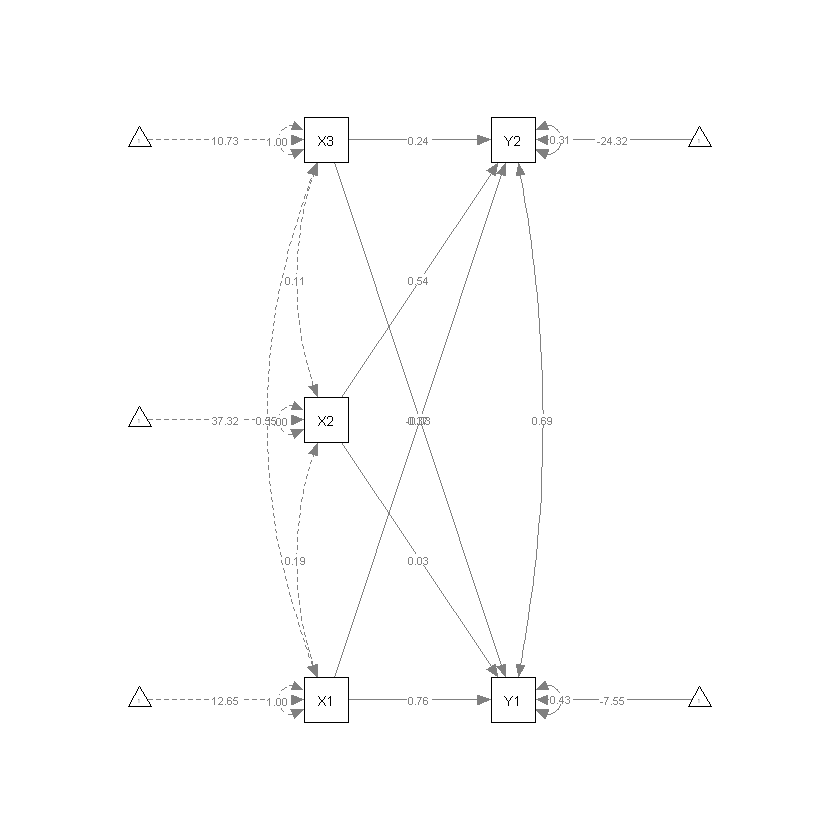

In [168]:
semPaths(Student.fit, whatLabels = "std", nCharNodes = 0, rotation = 2)

<br>

#### 다변량 회귀분석의 결과
* **회귀계수**

| 내생변수 | 설명변수 | 회귀계수 | 표준화 추정치 | p-값 | SMC ($R^2$) |
| - | - | - | - | - | - |
| Y1 | Intercept | -5.619 | - | 0.243 | 0.568 |
| Y1 | X1 | 0.085 | 0.763 | <0.001 |  |
| Y1 | X2 | 0.008 | 0.034 | 0.843 |  |
| Y1 | X3 | -0.015 | -0.032 | 0.876 | |
|   |
| Y2 | Intercept | -20.405 | - | <0.001 | 0.685 |
| Y2 | X1 | 0.0.047 | 0.375 | 0.033 |  |
| Y2 | X2 | 0.145 | 0.537 | <0.001 |  |
| Y2 | X3 | -0.015 | -0.126 | 0.172 | |


* **편상관**
| 내생변수 | 공분산 | 상관계수 | p-값 | 
| - | - | - | - |
| Y1, Y2 | 0.158 | 0.686 | 0.029 |


<br>

#### 결측값이 있는 경우의 다변량 회귀분석
- 15개의 행 중 11개만 사용

In [181]:
Stu_Missing <- read.csv(paste0(getwd(), "/Data/Stu_Missing.csv"), header = TRUE)
Stu_MissingA.fit <- sem(Student.model, data = Stu_Missing, fixed.x = FALSE, missing="ml")
Stu_MissingA.fit

lavaan 0.6.16 ended normally after 68 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        20

  Number of observations                            15
  Number of missing patterns                         5

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

In [177]:
summary(Stu_MissingA.fit, rsquare = TRUE, standardized = TRUE)$pe

lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Y1,~,X1,0,0.08988341,0.02043331,4.3988675,1.088172e-05,0.08988341,0.80956637,0.12371157
Y1,~,X2,0,-0.02986909,0.04723512,-0.6323493,5.271587e-01,-0.02986909,-0.13033093,-0.04111050
Y1,~,X3,0,0.10045069,0.11135503,0.9020759,3.670166e-01,0.10045069,0.21923433,0.13825591
Y2,~,X1,0,0.05936976,0.01974907,3.0062049,2.645307e-03,0.05936976,0.45926301,0.07018096
Y2,~,X2,0,0.09892284,0.04429804,2.2331198,2.554104e-02,0.09892284,0.37071935,0.11693663
Y2,~,X3,0,0.22320460,0.11456793,1.9482294,5.138752e-02,0.22320460,0.41839068,0.26385002
Y1,~~,Y2,0,0.10721248,0.06059457,1.7693415,7.683690e-02,0.10721248,0.59173988,0.59173988
Y1,~~,Y1,0,0.18308886,0.07607844,2.4065801,1.610267e-02,0.18308886,0.34683545,0.34683545
Y2,~~,Y2,0,0.17929456,0.07405478,2.4211072,1.547331e-02,0.17929456,0.25053886,0.25053886


<br>

### FIML (Full Information Maximum Likelihood)
- 특별한 형태의 최대우도법
- **EM 알고리즘 (Expectation-Maximization)**
    1. **E(기대)-단계 : 결측값들이 추정된 통계적 정보들에 의해 예측된 값으로 대체**
    2. **M(최대화)-단계 : 관측된 자료와 대체된 자료를 모두 이용하여 통계적 정보(분산, 공분산 등)을 추정한 후, 안정된 값들이 생성될 때 까지 두 단계를 반복**
    
- FIML 방법은 개체를 제거하거나, 결측값을 대체하지 않고서도 모수들을 추정할 수도 있는 장점 존재
    - **하지만, 최대우도법 이외에 다른 추정법을 사용할 수 없으며, 중요한 통계량들이 계산되지 않을 수 있고, 결측값이 많거나, 결측값에 특정한 패턴이 존재할 경우 편향된 결과를 얻을 수 있음**